Una empresa de remises almacena la geoposición de cada uno de sus vehículos en cada uno de los viajes realizados. 

**La ciudad por donde realizan los viajes los vehículos de la empresa es un cuadrado conformado por 100 avenidas verticales y 100 calles horizontales.**

Y la geolocalización se almacena cada vez que el vehículo llega a una intersección entre una avenida y una calle.

El dataset posee los siguientes atributos: 
    
    (ID_vehículo, Avenida, Calle, Timestamp, Destino)

**Un viaje comienza en una determinada esquina y finaliza en otra, la finalización del viaje está marcada con el lugar de destino.**

Durante el trayecto se van registrando todas las esquinas por la cual transita el vehículo hasta llegar a su destino.

Ejemplo:

    ID    Ave  Calle Timestamp Destino
    905   28   28     8079
    905   28   27     8088
    905   27   27     8097
    905   26   27     8106
    905   25   27     8115
    905   24   27     8124     Escuela

*NOTA: Se ha de suponer que los vehículos son “Big Data” y que cada vehículo puede hacer “Big Data” viajes.*

*NOTA 2: Si bien el archivo con el dataset tiene los viajes de cada vehículo “ordenados”, este orden solo debería tener propósito de depuración. Para la resolución de los ejercicios no se puede asumir ningún orden en el dataset.*


In [ ]:

# Instalamos Spark para Python
!pip install pyspark

import os

# Instalamos Java SDK 8
!apt-get install -y openjdk-8-jdk -qq > /dev/null      
!echo $(/usr/libexec/java_home -v 1.8)

#set environment variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     
!echo 2 | update-alternatives --config java



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 46 kB/s 
     |████████████████████████████████| 199 kB 45.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=398a27c5125ab36da38e4ca84ddaed67811612ac548ba3c31e6daff9dc5a51f5
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
/bin/bash: /usr/libexec/java_home: No such file or directory

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-a

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)
root_path = 'file:///content/drive/My_Drive/Colab_Notebooks/'

Mounted at /content/drive


In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "Actividad2-Spark-Yáñez, Gagliardi")  


#1) Implemente un script de Spark que permita conocer cuántos viajes realizó cada vehículo.
*Recordar que un viaje es una serie de coordenadas que finalizan en un destino
determinado.*

In [ ]:
travelCount = sc.textFile('/content/drive/MyDrive/Colab Notebooks/Datasets/Trafico') \
              .map(lambda l: l.split("\t")) \
              .filter(lambda t: t[4] != "")\
              .map(lambda t: (int(t[0]),1))\
              .reduceByKey(lambda v1, v2: v1 + v2)\
              .sortByKey()\
              .collect()
    
for t in travelCount:
  print("ID: "+str(t[0])+" - Viajes: "+str(t[1]))

ID: 1 - Viajes: 1
ID: 2 - Viajes: 2
ID: 3 - Viajes: 3
ID: 4 - Viajes: 1
ID: 5 - Viajes: 1
ID: 6 - Viajes: 1
ID: 10 - Viajes: 1
ID: 11 - Viajes: 2
ID: 12 - Viajes: 2
ID: 13 - Viajes: 3
ID: 14 - Viajes: 1
ID: 16 - Viajes: 1
ID: 17 - Viajes: 3
ID: 18 - Viajes: 2
ID: 19 - Viajes: 2
ID: 20 - Viajes: 2
ID: 21 - Viajes: 2
ID: 22 - Viajes: 4
ID: 23 - Viajes: 1
ID: 24 - Viajes: 1
ID: 26 - Viajes: 2
ID: 27 - Viajes: 2
ID: 28 - Viajes: 1
ID: 29 - Viajes: 3
ID: 30 - Viajes: 1
ID: 31 - Viajes: 2
ID: 32 - Viajes: 1
ID: 33 - Viajes: 1
ID: 34 - Viajes: 3
ID: 35 - Viajes: 1
ID: 39 - Viajes: 5
ID: 40 - Viajes: 1
ID: 41 - Viajes: 2
ID: 42 - Viajes: 2
ID: 43 - Viajes: 2
ID: 44 - Viajes: 8
ID: 46 - Viajes: 1
ID: 47 - Viajes: 2
ID: 48 - Viajes: 1
ID: 50 - Viajes: 3
ID: 51 - Viajes: 1
ID: 54 - Viajes: 2
ID: 55 - Viajes: 3
ID: 56 - Viajes: 2
ID: 57 - Viajes: 2
ID: 58 - Viajes: 1
ID: 59 - Viajes: 4
ID: 60 - Viajes: 1
ID: 61 - Viajes: 1
ID: 62 - Viajes: 1
ID: 63 - Viajes: 1
ID: 64 - Viajes: 1
ID: 65 - Viajes: 2

#2) Implemente un script de Spark que permita conocer cual es el top 3 de los tipos" de destinos más visitados.
*Los "tipos" de destino válidos son "Hospital", "Escuela", "Plaza", "Ferretería","Farmacia", "Supermercado", "Museo",* 
#NO interesa contar a los destinos "Otro".

In [ ]:
topDestino = sc.textFile("/content/drive/MyDrive/Colab Notebooks/Datasets/Trafico") \
            .map(lambda l: l.split("\t")) \
            .filter(lambda t: t[4] != "" and t[4] != "Otro")\
            .map(lambda t: (t[4],1))\
            .reduceByKey(lambda v1, v2: v1 + v2)\
            .map(lambda t:(t[1],t[0]))

print(topDestino.top(3))

[(165, 'Supermercado'), (98, 'Escuela'), (95, 'Museo')]


#3) Implemente un script de Spark que permita conocer la cantidad de vehículos en movimiento por franja horaria. 
*La duración de la franja horaria es un parámetro de la consulta.*


In [ ]:
param1=int(input("Introduzca la duracion de la franja horaria: "))
enLaFranja = sc.textFile("/content/drive/MyDrive/Colab Notebooks/Datasets/Trafico") \
            .map(lambda l: l.split("\t")) \
            .map(lambda t: (int(int(t[3])/int(param1)) ,t[0]))\
            .distinct()\
            .sortByKey()\
            .countByKey()

for x,y in enLaFranja.items():
  print(str(int(param1)*x)+"-"+str(int(param1)*(x+1)-1)+": "+ str(y))

Introduzca la duracion de la franja horaria: 1000
0-999: 693
1000-1999: 625
2000-2999: 518
3000-3999: 410
4000-4999: 316
5000-5999: 251
6000-6999: 190
7000-7999: 133
8000-8999: 106
9000-9999: 80
10000-10999: 51
11000-11999: 37
12000-12999: 23
13000-13999: 20
14000-14999: 16
15000-15999: 11
16000-16999: 5
17000-17999: 3
18000-18999: 2
19000-19999: 2
20000-20999: 2
21000-21999: 1
22000-22999: 1
23000-23999: 1


#4) Implemente un script de Spark que permita conocer cuál es el top 10 de las esquinas (avenida, calle) más transitadas por vehículos diferentes. 
*En esta consulta cada vehículo cuenta como paso de una esquina una única vez, independientemente de que el mismo vehículo haya pasado por la misma esquina varias veces en diferentes viajes.*

In [ ]:
esquinas  = sc.textFile("/content/drive/MyDrive/Colab Notebooks/Datasets/Trafico") \
          .map(lambda l: l.split("\t")) \
          .map(lambda d: (int(d[0]), str(d[1]), str(d[2])))\
          .distinct()\
          .map(lambda d: (d[1]+"-"+d[2],1))\
          .reduceByKey(lambda v1, v2: v1 + v2)\
          .map(lambda d: (d[1],d[0]))\
          .sortByKey(False,1)

top10 = esquinas.top(10)
for esq in top10:
  print(esq[1], ":", esq[0])

83-26 : 40
83-33 : 39
83-25 : 38
40-20 : 37
49-25 : 36
40-25 : 36
76-25 : 34
86-60 : 33
86-47 : 33
66-25 : 33


#5) Implemente un script de Spark que permita conocer la avenida y la calle más recorrida.
*La avenida (y también la calle) más recorrida es aquella por la que transitaron más vehículos en cualquiera de sus tramos. En esta consulta, cada vehículo puede sumar más de una vez si pasó por la misma cuadra varias veces.*
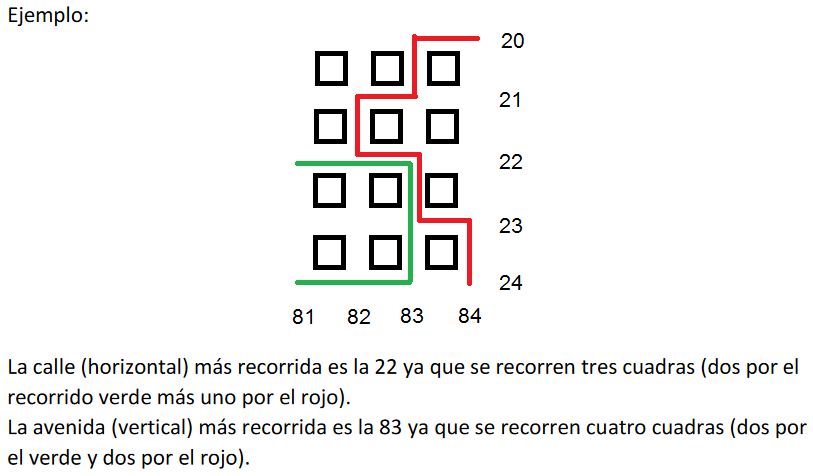

In [ ]:
umbral = 100 
data = sc.textFile("/content/drive/MyDrive/Colab Notebooks/Datasets/Trafico")
data = data.map(lambda t: t.split('\t'))
# avenidas = ((id, av), (ca, ts)) --> usamos como clave el id del auto junto con la av
avenidas = data.map(lambda t: ((t[0], t[1]), (int(t[2]), int(t[3]))))
# al hacer el join las tuplas quedan: ( (id,av),( (ca,ts),(ca,ts) ) )
# filtramos las que no tienen calles consecutivas y las que el ts supera el umbral
# despues de filtrar las tuplas dejamos como key solo la avenida y como value 1 para contar: (av, 1)
tramos_av = avenidas.join(avenidas)\
            .filter(lambda t: t[1][0][0]+1 == t[1][1][0] )\
            .filter(lambda t: abs(t[1][1][1] - t[1][0][1]) < umbral )\
            .map(lambda t: (t[0][1], 1))\
            .reduceByKey(lambda v1, v2: v1+v2)\
            .map(lambda t: (t[1], t[0]))\
            .sortByKey(False,1)\
            .map(lambda t:(t[1],t[0]))
av_mas_recorrida = tramos_av.first()

# hacemos lo mismo para las calles
calles = data.map(lambda t: ((t[0], t[2]), (int(t[1]), int(t[3]))))
tramos_ca = calles.join(calles)\
            .filter(lambda t: t[1][0][0]+1 == t[1][1][0] )\
            .filter(lambda t: abs(t[1][1][1] - t[1][0][1]) < umbral )\
            .map(lambda t: (t[0][1], 1))\
            .reduceByKey(lambda v1, v2: v1+v2)\
            .map(lambda t: (t[1], t[0]))\
            .sortByKey(False,1)\
            .map(lambda t:(t[1],t[0]))
ca_mas_recorrida = tramos_ca.first()

print("La avenida más recorrida fué: "+str(av_mas_recorrida[0])+" con "+str(av_mas_recorrida[1])+" tramos. La calle más recorrida fué: "+str(ca_mas_recorrida[0])+" con "+str(ca_mas_recorrida[1])+" tramos.")

La avenida más recorrida fué: 94 con 1709 tramos. La calle más recorrida fué: 89 con 1789 tramos.


In [ ]:
#Sería más eficiente resolver este último punto de otra manera.   
#Debido a que el join es muy costoso y nosotros planteamos uno para las calles y otro para las avenidas, sería conveniente realizar un solo join y después sacar 2 branches calles y avenidas.
#También, tanto en tramos_av como en tramos_ca, se realiza un map que pone la cantidad de viajes como clave y la calle o avenida como valor. Luego se ordena y se vuelven a invertir. 
#Ese ordenamiento también es muy costoso, pudiéndose resolverlo con un reduce que obtenga el máximo a modo de evitar ordenar.